1. Load the data and libraries
2. Data Preparation and Data Transformation
3. Data Visualization
4. Data Analysis
   1. Uni Variate
   2. Bi- Variate
   3. Multi- Variate
      1. Classification
         1. Logistic Regression
         2. Decision Tree
         3. Random Forest
         4. Boosting
5. Evaluate the model
6. Apply the model to test data
7. Evaluate results using the submission data

1. Dataset Name: Ford Stay Alert
2. Author: Sofi
3. Date:23-02-2024
4. Version = 1



**Load libraries and data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
!unzip '/content/stayalert (4).zip' #unzip

Archive:  /content/stayalert (4).zip
  inflating: Solution.csv            
  inflating: example_submission.csv  
  inflating: fordTest.csv            
  inflating: fordTrain.csv           


**Load the data**

In [ ]:
train=pd.read_csv('fordTrain.csv')
test=pd.read_csv('fordTest.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

Exploratory Data Analysis

In [ ]:
train.describe()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,...,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.0,604329.000000,604329.000000
mean,250.167657,603.841765,0.578799,35.449020,11.996525,1026.671035,64.061965,0.178923,845.384610,77.887628,...,-0.037710,573.786433,19.961030,0.179814,1715.688383,0.0,12.710354,0.0,3.312257,11.668277
std,145.446164,348.931601,0.493752,7.484629,3.760292,309.277877,19.755950,0.372309,2505.335141,18.577930,...,0.403896,298.412888,63.269456,0.384033,618.176470,0.0,11.532085,0.0,1.243586,9.934423
min,0.000000,0.000000,0.000000,-22.481200,-45.629200,504.000000,23.885300,0.038920,128.000000,0.262224,...,-4.795000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.676730
25%,125.000000,302.000000,0.000000,31.758100,9.903540,792.000000,49.180300,0.092110,668.000000,66.666700,...,-0.175000,255.000000,1.487500,0.000000,1259.000000,0.0,0.000000,0.0,3.000000,7.947680
50%,250.000000,604.000000,1.000000,34.145100,11.400400,1000.000000,60.000000,0.105083,800.000000,75.000000,...,0.000000,511.000000,3.018750,0.000000,1994.000000,0.0,12.800000,0.0,4.000000,10.772600
75%,374.000000,906.000000,1.000000,37.311900,13.644200,1220.000000,75.757600,0.138814,900.000000,89.820400,...,0.070000,767.000000,7.481250,0.000000,2146.000000,0.0,21.900000,0.0,4.000000,15.270900
max,510.000000,1210.000000,1.000000,101.351000,71.173700,2512.000000,119.048000,27.202200,228812.000000,468.750000,...,3.990000,1023.000000,484.488000,1.000000,4892.000000,0.0,82.100000,0.0,7.000000,262.534000


In [ ]:
train.skew()

TrialID     0.024138
ObsNum      0.000214
IsAlert    -0.319185
P1          2.445986
P2          0.863450
P3          0.507984
P4          0.643117
P5         20.225034
P6         89.789752
P7          1.937124
P8          0.000000
E1          0.766075
E2          0.754220
E3          3.352342
E4         -2.467771
E5          0.175100
E6         -0.469872
E7          2.844119
E8          2.200218
E9         -2.292728
E10        -0.433540
E11         4.062888
V1         -0.941470
V2         -0.759452
V3          0.261053
V4          5.144928
V5          1.667496
V6         -0.871827
V7          0.000000
V8          0.406715
V9          0.000000
V10        -1.172114
V11        21.165566
dtype: float64

In [ ]:
train.skew()

TrialID     0.024138
ObsNum      0.000214
IsAlert    -0.319185
P1          2.445986
P2          0.863450
P3          0.507984
P4          0.643117
P5         20.225034
P6         89.789752
P7          1.937124
P8          0.000000
E1          0.766075
E2          0.754220
E3          3.352342
E4         -2.467771
E5          0.175100
E6         -0.469872
E7          2.844119
E8          2.200218
E9         -2.292728
E10        -0.433540
E11         4.062888
V1         -0.941470
V2         -0.759452
V3          0.261053
V4          5.144928
V5          1.667496
V6         -0.871827
V7          0.000000
V8          0.406715
V9          0.000000
V10        -1.172114
V11        21.165566
dtype: float64

Univariate Analysis


1. P1

<Axes: xlabel='P1', ylabel='Density'>

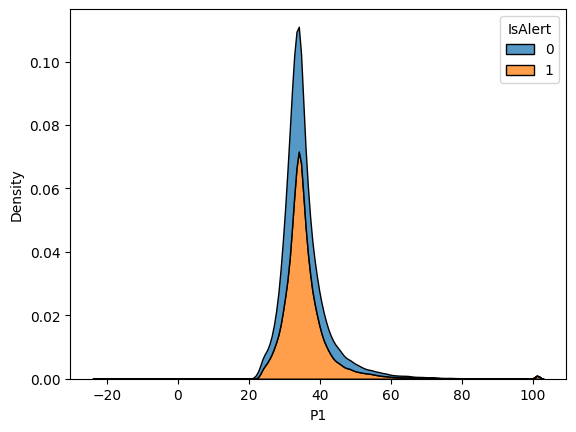

In [ ]:
sns.kdeplot(data=train,x="P1",hue="IsAlert",multiple="stack")

Inference


1.  It is a non linear data
2.  Both kde plots are overlapping



2. P2

<Axes: xlabel='P2', ylabel='Density'>

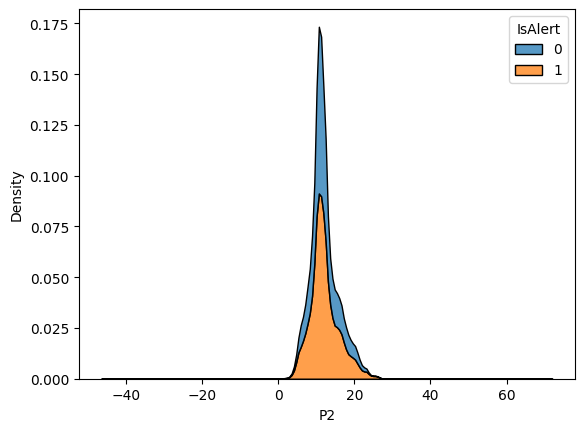

In [ ]:
sns.kdeplot(data=train,x="P2",hue="IsAlert",multiple="stack")

Inference
1.  skew =0.863450
2. Plots are overlapping


3. P3

<Axes: xlabel='P3', ylabel='Density'>

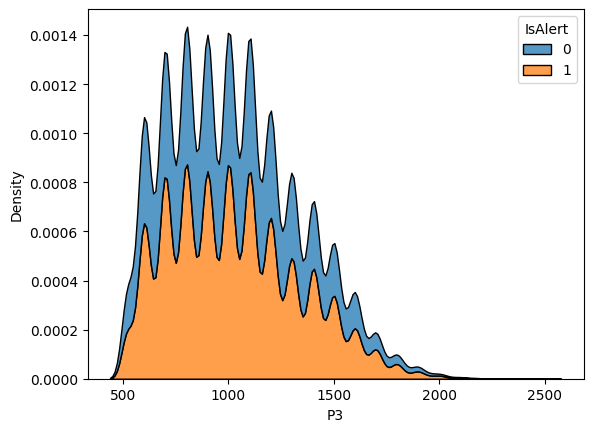

In [ ]:
sns.kdeplot(data=train,x="P3",hue="IsAlert",multiple="stack")

Inference:
1.  It is a non linear data
2.  Both kde plots are overlapping

4.P4

<Axes: xlabel='P4', ylabel='Density'>

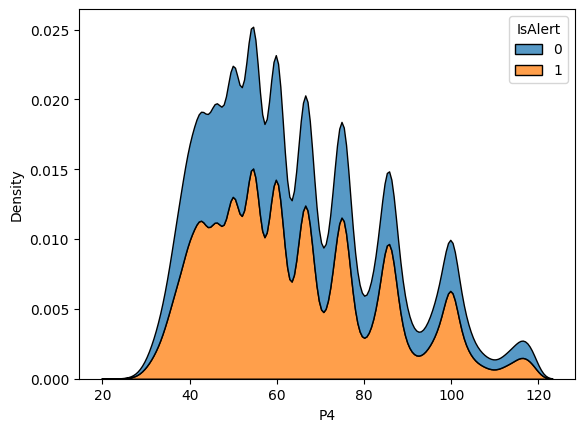

In [ ]:
sns.kdeplot(data=train,x="P4",hue="IsAlert",multiple="stack")

Inference
1.  It is a non linear data
2.  Both kde plots are overlapping

5. P5

<Axes: xlabel='P5', ylabel='Density'>

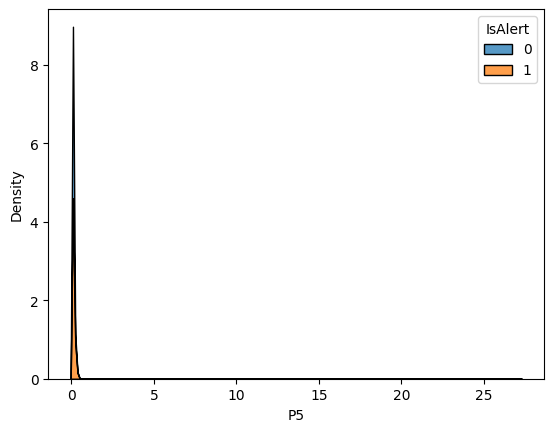

In [ ]:
sns.kdeplot(data=train,x="P5",hue="IsAlert",multiple="stack")

6.P6

<Axes: xlabel='P6', ylabel='Density'>

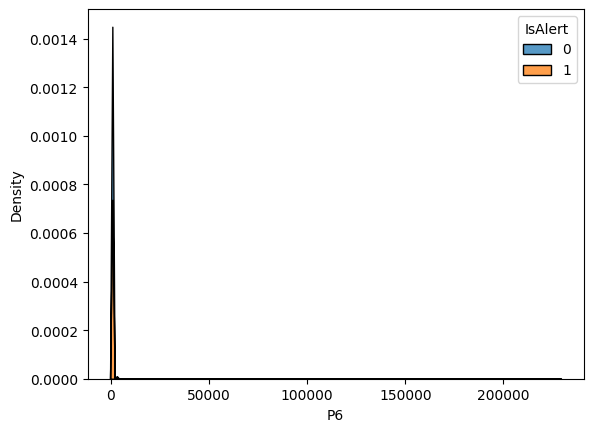

In [ ]:
sns.kdeplot(data=train,x="P6",hue="IsAlert",multiple="stack")

7. P7

<Axes: xlabel='P7', ylabel='Density'>

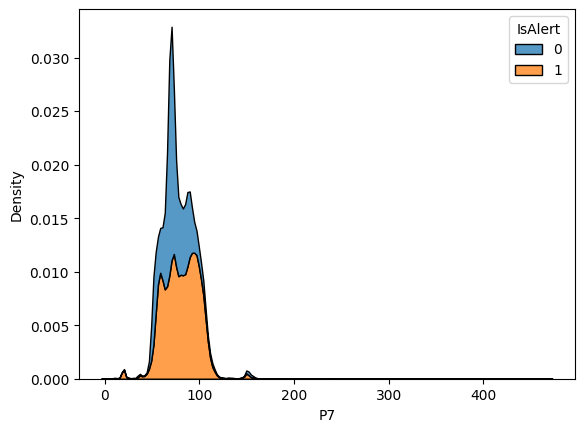

In [ ]:
sns.kdeplot(data=train,x="P7",hue="IsAlert",multiple="stack")

8.P8

In [ ]:
train['P8'].values

array([0, 0, 0, ..., 0, 0, 0])

<Axes: xlabel='E1', ylabel='Density'>

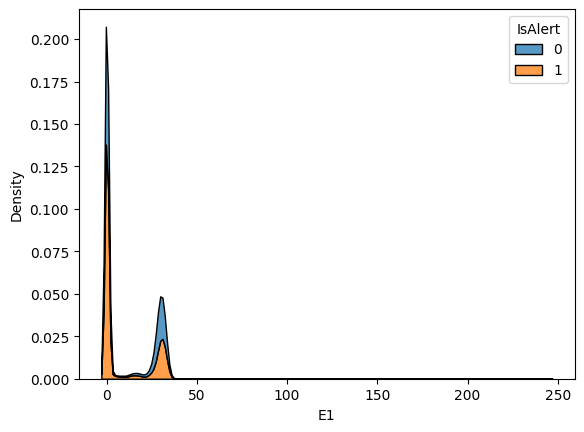

In [ ]:
sns.kdeplot(data=train,x="E1",hue="IsAlert",multiple="stack")

<Axes: xlabel='E2', ylabel='Density'>

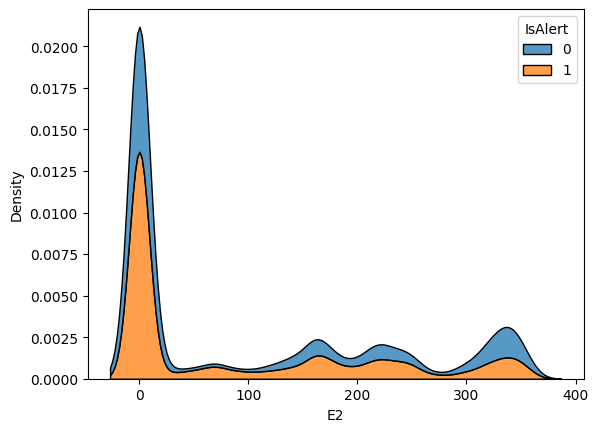

In [ ]:
sns.kdeplot(data=train,x="E2",hue="IsAlert",multiple="stack")

<Axes: xlabel='E3', ylabel='Density'>

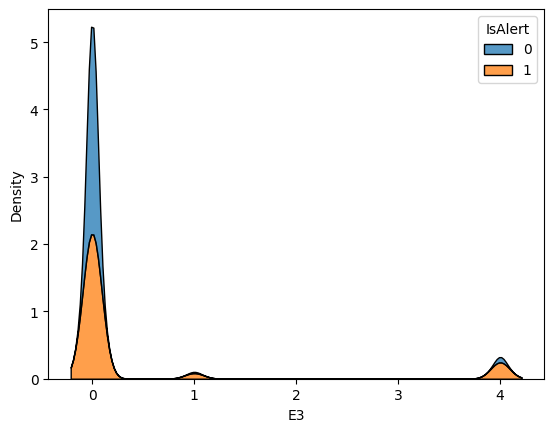

In [ ]:
sns.kdeplot(data=train,x="E3",hue="IsAlert",multiple="stack")

<Axes: xlabel='E4', ylabel='Density'>

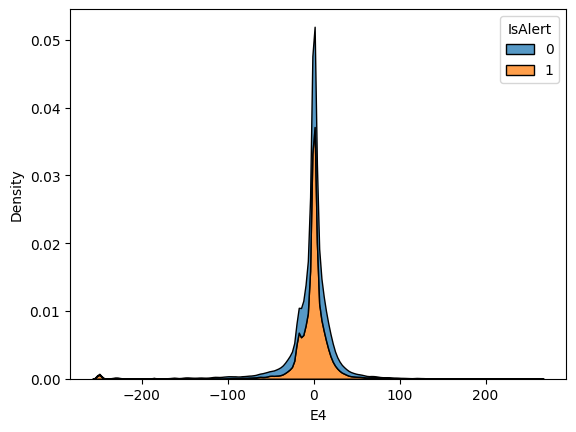

In [ ]:
sns.kdeplot(data=train,x="E4",hue="IsAlert",multiple="stack")

<Axes: xlabel='E5', ylabel='Density'>

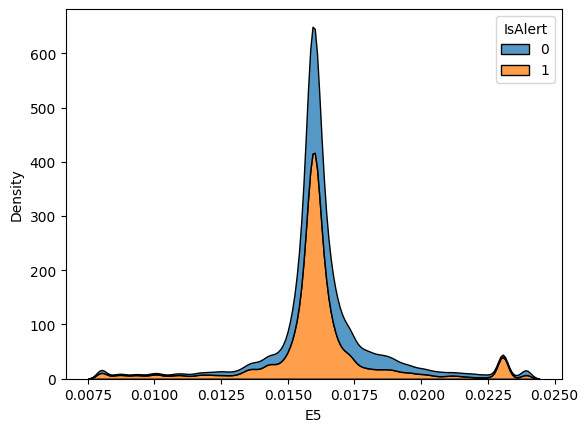

In [ ]:
sns.kdeplot(data=train,x="E5",hue="IsAlert",multiple="stack")

<Axes: xlabel='E7', ylabel='Density'>

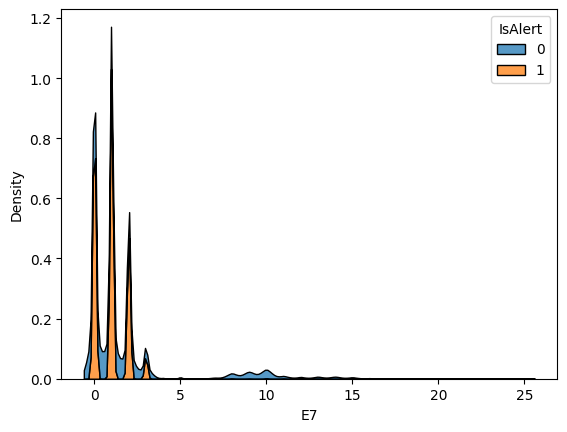

In [ ]:
sns.kdeplot(data=train,x="E7",hue="IsAlert",multiple="stack")

<Axes: xlabel='E8', ylabel='Density'>

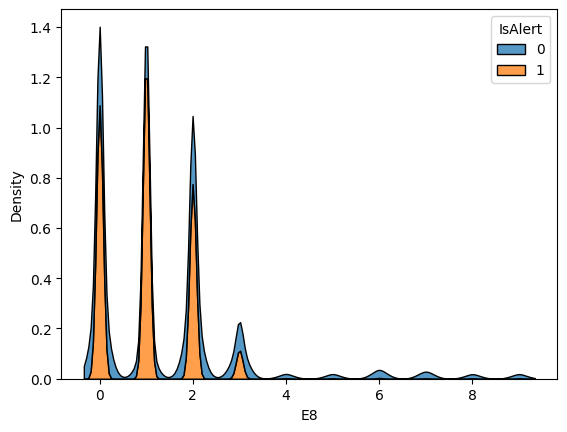

In [ ]:
sns.kdeplot(data=train,x="E8",hue="IsAlert",multiple="stack")

<Axes: xlabel='E9', ylabel='Density'>

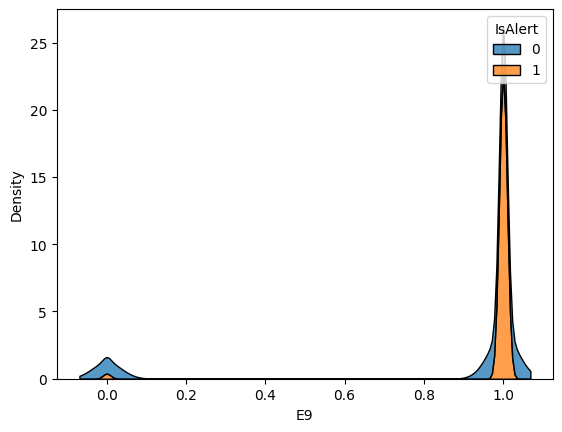

In [ ]:
sns.kdeplot(data=train,x="E9",hue="IsAlert",multiple="stack")

<Axes: xlabel='E10', ylabel='Density'>

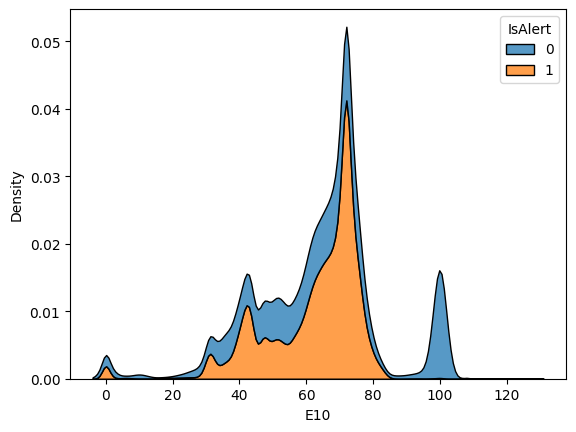

In [ ]:
sns.kdeplot(data=train,x="E10",hue="IsAlert",multiple="stack")

<Axes: xlabel='E11', ylabel='Density'>

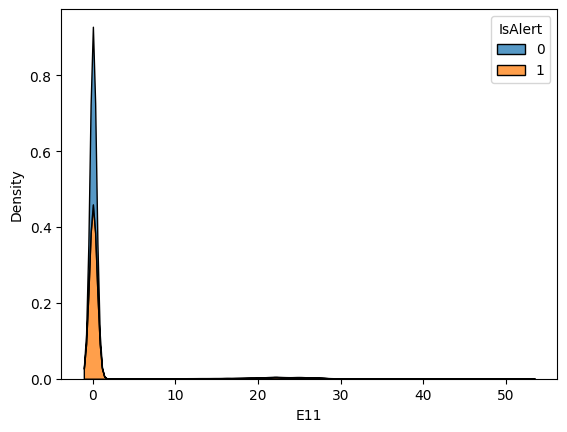

In [ ]:
sns.kdeplot(data=train,x="E11",hue="IsAlert",multiple="stack")

<Axes: xlabel='V1', ylabel='Density'>

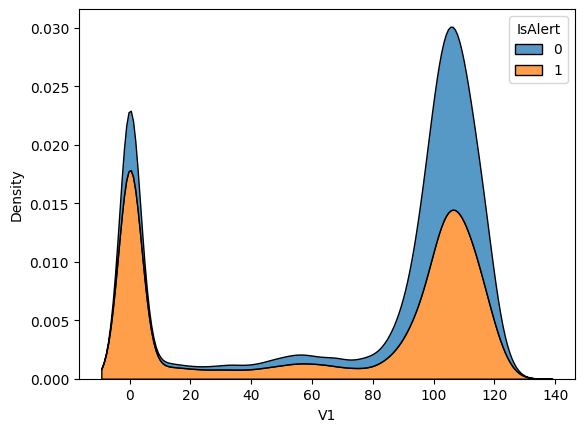

In [ ]:
sns.kdeplot(data=train,x="V1",hue="IsAlert",multiple="stack")

<Axes: xlabel='V2', ylabel='Density'>

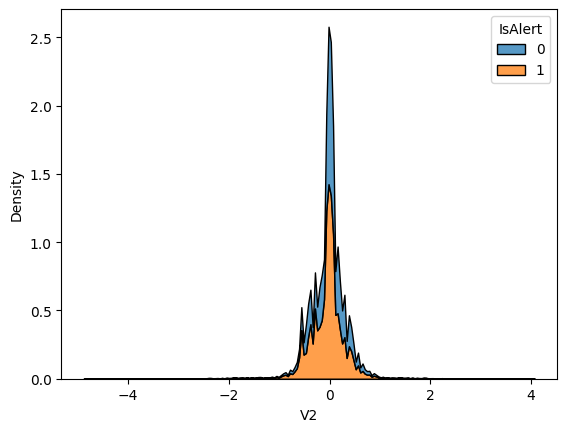

In [ ]:
sns.kdeplot(data=train,x="V2",hue="IsAlert",multiple="stack")

<Axes: xlabel='V3', ylabel='Density'>

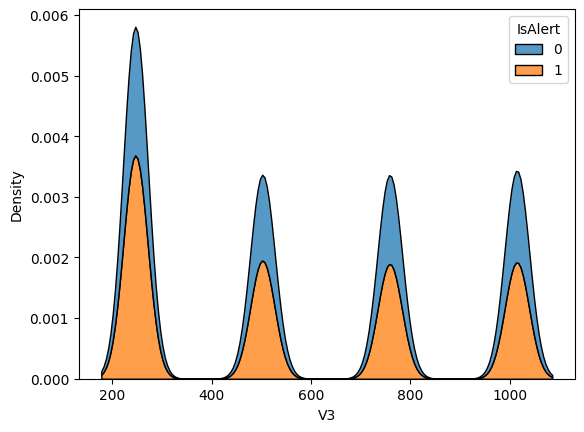

In [ ]:
sns.kdeplot(data=train,x="V3",hue="IsAlert",multiple="stack")

<Axes: xlabel='V4', ylabel='Density'>

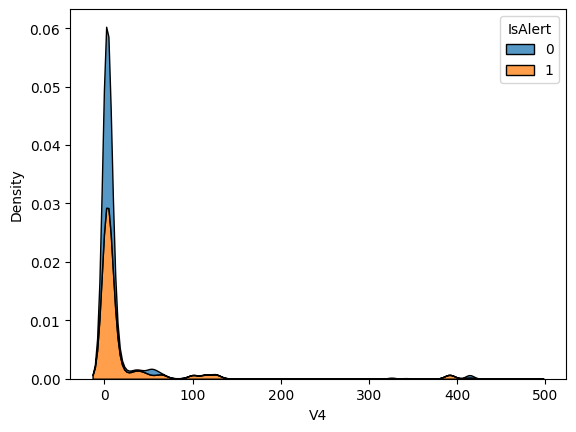

In [ ]:
sns.kdeplot(data=train,x="V4",hue="IsAlert",multiple="stack")

<Axes: xlabel='V5', ylabel='Density'>

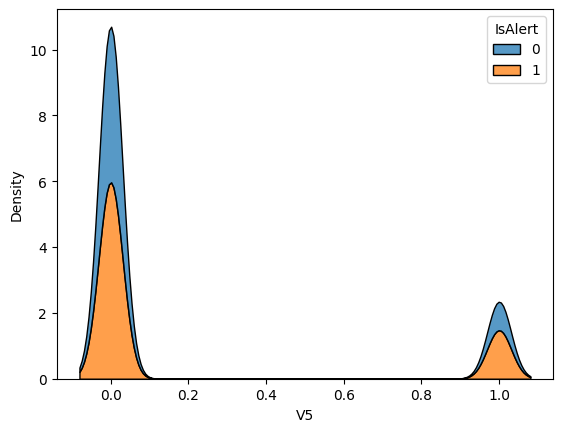

In [ ]:
sns.kdeplot(data=train,x="V5",hue="IsAlert",multiple="stack")

<Axes: xlabel='V6', ylabel='Density'>

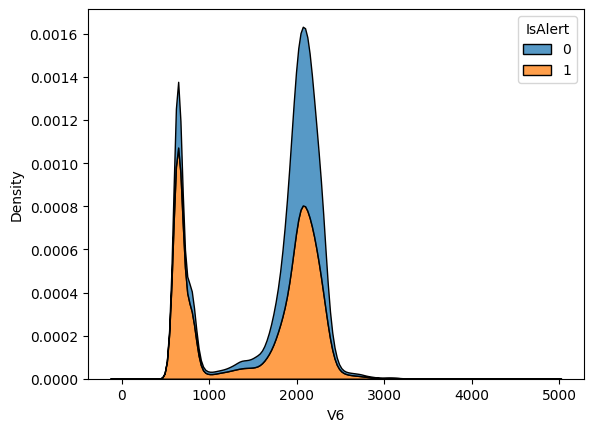

In [ ]:
sns.kdeplot(data=train,x="V6",hue="IsAlert",multiple="stack")

In [ ]:
train['V7'].values

array([0, 0, 0, ..., 0, 0, 0])

<Axes: xlabel='V8', ylabel='Density'>

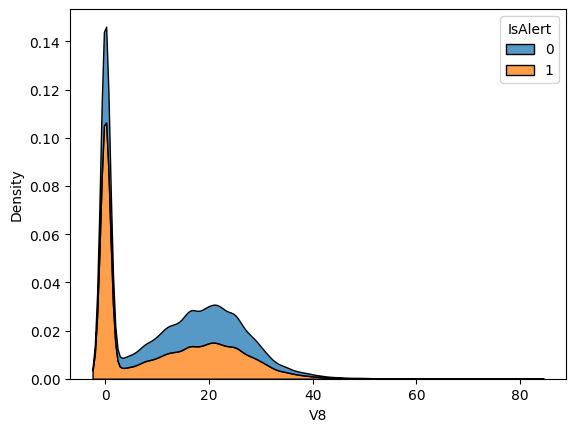

In [ ]:
sns.kdeplot(data=train,x="V8",hue="IsAlert",multiple="stack")

In [ ]:
train['V9'].values

array([0, 0, 0, ..., 0, 0, 0])

<Axes: xlabel='V10', ylabel='Density'>

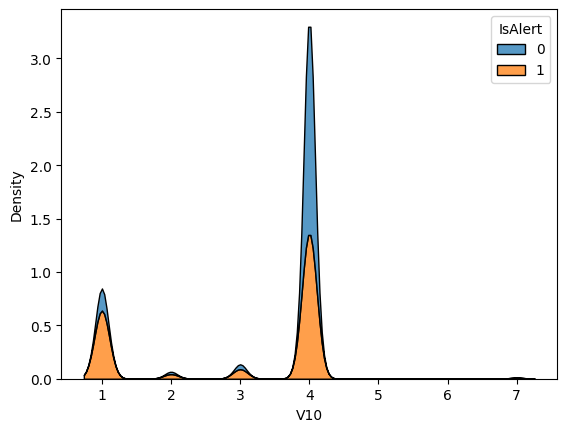

In [ ]:
sns.kdeplot(data=train,x="V10",hue="IsAlert",multiple="stack")

<Axes: xlabel='V11', ylabel='Density'>

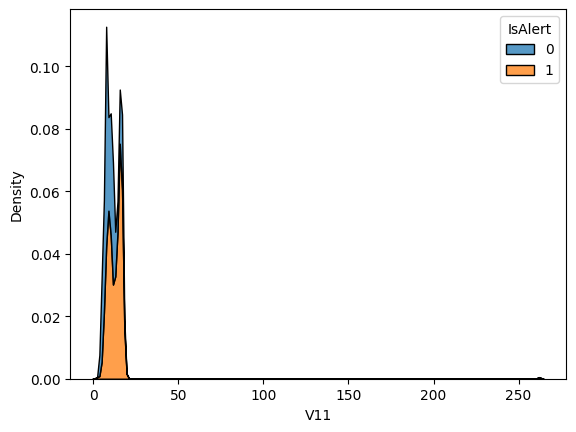

In [ ]:
sns.kdeplot(data=train,x="V11",hue="IsAlert",multiple="stack")

Bivariate Analysis

<Axes: >

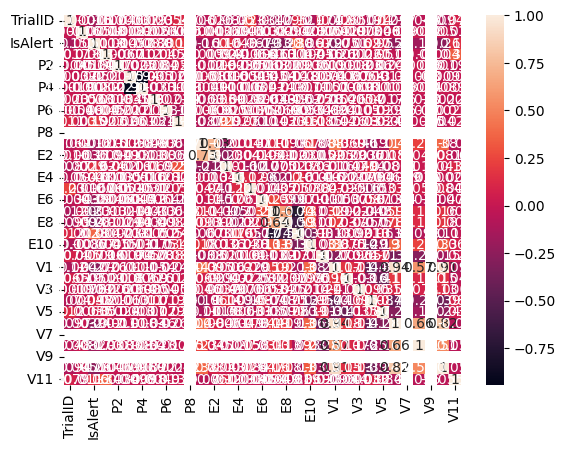

In [ ]:
sns.heatmap(train.corr(),annot=True)

Data Preprocessing

Divide the data into X and Y

In [ ]:
y=train['IsAlert']
x=train.iloc[:,3:]

Split the data into train and test

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(483463, 30)
(120866, 30)
(483463,)
(120866,)


Multivarite Models

Logistic Regression

In [ ]:
log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(x_train,y_train)
y_hat_train_logreg=log_reg.predict(x_train)
y_hat_test_logreg=log_reg.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
def model_eval(actual,predicted):
  conf_matrix=confusion_matrix(actual,predicted)
  clas_rep=classification_report(actual,predicted)
  acc_score=accuracy_score(actual,predicted)
  print("The accuracy of the model is",round(acc_score,2))
  print(conf_matrix)
  print(clas_rep)

In [ ]:
model_eval(y_train,y_hat_train_logreg)

The accuracy of the model is 0.75
[[138685  64642]
 [ 54175 225961]]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70    203327
           1       0.78      0.81      0.79    280136

    accuracy                           0.75    483463
   macro avg       0.75      0.74      0.75    483463
weighted avg       0.75      0.75      0.75    483463



In [ ]:
model_eval(y_test,y_hat_test_logreg)

The accuracy of the model is 0.75
[[34935 16282]
 [13539 56110]]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70     51217
           1       0.78      0.81      0.79     69649

    accuracy                           0.75    120866
   macro avg       0.75      0.74      0.75    120866
weighted avg       0.75      0.75      0.75    120866



Inference

> High bias and low variance



Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
#fit the model
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_hat_train_dtree=dtree.predict(x_train)
y_hat_test_dtree=dtree.predict(x_test)

In [ ]:
def model_eval(actual,predicted):
  conf_matrix=confusion_matrix(actual,predicted)
  clas_rep=classification_report(actual,predicted)
  acc_score=accuracy_score(actual,predicted)
  print("The accuracy of the model is",round(acc_score,2))
  print(conf_matrix)
  print(clas_rep)

In [ ]:
model_eval(y_test,y_hat_test_dtree)

The accuracy of the model is 0.99
[[50467   750]
 [  780 68869]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     51217
           1       0.99      0.99      0.99     69649

    accuracy                           0.99    120866
   macro avg       0.99      0.99      0.99    120866
weighted avg       0.99      0.99      0.99    120866



In [ ]:
model_eval(y_train,y_hat_train_dtree)

The accuracy of the model is 1.0
[[203327      0]
 [     0 280136]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203327
           1       1.00      1.00      1.00    280136

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463



Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_hat_train_rf=rf.predict(x_train)
y_hat_test_rf=rf.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_rf)

The accuracy of the model is 1.0
[[203327      0]
 [     0 280136]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203327
           1       1.00      1.00      1.00    280136

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463



In [ ]:
model_eval(y_test,y_hat_test_rf)

The accuracy of the model is 0.99
[[50665   552]
 [   91 69558]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     51217
           1       0.99      1.00      1.00     69649

    accuracy                           0.99    120866
   macro avg       1.00      0.99      0.99    120866
weighted avg       0.99      0.99      0.99    120866



In [ ]:
importances=rf.feature_importances_

In [ ]:
importances_df=pd.DataFrame({'features':x_train.columns,'importance':importances})

In [ ]:
print(importances_df)


   features  importance
0        P1    0.027968
1        P2    0.005105
2        P3    0.011353
3        P4    0.011499
4        P5    0.046351
5        P6    0.052709
6        P7    0.057705
7        P8    0.000000
8        E1    0.014154
9        E2    0.022522
10       E3    0.002846
11       E4    0.016287
12       E5    0.036391
13       E6    0.051541
14       E7    0.067707
15       E8    0.063288
16       E9    0.048155
17      E10    0.100730
18      E11    0.003803
19       V1    0.062309
20       V2    0.017987
21       V3    0.011590
22       V4    0.024495
23       V5    0.003972
24       V6    0.042250
25       V7    0.000000
26       V8    0.017873
27       V9    0.000000
28      V10    0.023157
29      V11    0.156253


Ada Boost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [ ]:
ada=AdaBoostClassifier(n_estimators=150)
ada.fit(x_train,y_train)
y_train_ada=ada.predict(x_train)
y_hat_test_ada=ada.predict(x_test)

In [ ]:
model_eval(y_train,y_train_ada)

The accuracy of the model is 0.86
[[161469  41858]
 [ 24071 256065]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83    203327
           1       0.86      0.91      0.89    280136

    accuracy                           0.86    483463
   macro avg       0.86      0.85      0.86    483463
weighted avg       0.86      0.86      0.86    483463



In [ ]:
model_eval(y_test,y_hat_test_ada)

The accuracy of the model is 0.86
[[40747 10470]
 [ 5909 63740]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83     51217
           1       0.86      0.92      0.89     69649

    accuracy                           0.86    120866
   macro avg       0.87      0.86      0.86    120866
weighted avg       0.87      0.86      0.86    120866



Gradient Boosting Classifier

In [ ]:
gb=GradientBoostingClassifier(n_estimators=150)
gb.fit(x_train,y_train)
y_hat_train_gb=gb.predict(x_train)
y_hat_test_gb=gb.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_gb)

The accuracy of the model is 0.9
[[168085  35242]
 [ 14131 266005]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87    203327
           1       0.88      0.95      0.92    280136

    accuracy                           0.90    483463
   macro avg       0.90      0.89      0.89    483463
weighted avg       0.90      0.90      0.90    483463



In [ ]:
model_eval(y_test,y_hat_test_gb)

The accuracy of the model is 0.9
[[42318  8899]
 [ 3449 66200]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87     51217
           1       0.88      0.95      0.91     69649

    accuracy                           0.90    120866
   macro avg       0.90      0.89      0.89    120866
weighted avg       0.90      0.90      0.90    120866



XG Boost Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb=XGBClassifier(n_estimators=200)

In [ ]:
xgb.fit(x_train,y_train)
y_hat_train_xgb=xgb.predict(x_train)
y_hat_test_xgb=xgb.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_xgb)

The accuracy of the model is 0.97
[[190956  12371]
 [  2008 278128]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96    203327
           1       0.96      0.99      0.97    280136

    accuracy                           0.97    483463
   macro avg       0.97      0.97      0.97    483463
weighted avg       0.97      0.97      0.97    483463



In [ ]:
model_eval(y_test,y_hat_test_xgb)

The accuracy of the model is 0.97
[[47862  3355]
 [  623 69026]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     51217
           1       0.95      0.99      0.97     69649

    accuracy                           0.97    120866
   macro avg       0.97      0.96      0.97    120866
weighted avg       0.97      0.97      0.97    120866



Application on test

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120840 entries, 0 to 120839
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  120840 non-null  int64  
 1   ObsNum   120840 non-null  int64  
 2   IsAlert  120840 non-null  object 
 3   P1       120840 non-null  float64
 4   P2       120840 non-null  float64
 5   P3       120840 non-null  int64  
 6   P4       120840 non-null  float64
 7   P5       120840 non-null  float64
 8   P6       120840 non-null  int64  
 9   P7       120840 non-null  float64
 10  P8       120840 non-null  int64  
 11  E1       120840 non-null  float64
 12  E2       120840 non-null  float64
 13  E3       120840 non-null  int64  
 14  E4       120840 non-null  int64  
 15  E5       120840 non-null  float64
 16  E6       120840 non-null  int64  
 17  E7       120840 non-null  int64  
 18  E8       120840 non-null  int64  
 19  E9       120840 non-null  int64  
 20  E10      120840 non-null  

In [ ]:
test=test.iloc[:,3:]

In [ ]:
test

,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,60.0000,0.302277,508,118.1100,0,0.000,0.000,4,4,0.015434,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1937
1,60.0000,0.302277,508,118.1100,0,0.000,0.000,4,4,0.015434,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1744
2,60.0000,0.302277,508,118.1100,0,0.000,0.000,4,8,0.015938,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1602
3,60.0000,0.302277,508,118.1100,0,0.000,0.000,4,8,0.015938,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1725
4,60.0000,0.302277,504,119.0480,0,0.000,0.000,4,8,0.015938,...,0.00,255,4.50625,0,2136,0,17.6,0,4,16.1459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120835,67.2646,0.131030,752,79.7872,0,0.068,214.033,0,0,0.015875,...,-0.07,255,0.00000,0,658,0,0.0,0,1,16.6850
120836,67.2646,0.131030,752,79.7872,0,0.068,214.033,0,0,0.015875,...,-0.07,255,0.00000,0,657,0,0.0,0,1,16.6840
120837,67.2646,0.131030,752,79.7872,0,0.068,214.033,0,0,0.015875,...,-0.07,255,0.00000,0,655,0,0.0,0,1,16.6487
120838,67.2646,0.131030,752,79.7872,0,0.068,214.033,0,0,0.015875,...,-0.07,240,0.00000,0,657,0,0.0,0,1,16.6314


In [ ]:
test_preds=xgb.predict(test)

In [ ]:
test_preds

array([1, 1, 1, ..., 1, 1, 1])

Submission

In [ ]:
submission=pd.read_csv('/content/example_submission.csv')

In [ ]:
submission['Prediction']=test_preds

In [ ]:
submission.head()

,TrialID,ObsNum,Prediction
0,0,0,1
1,0,1,1
2,0,2,1
3,0,3,1
4,0,4,1


Checking the accuracy

In [ ]:
solution=pd.read_csv('/content/Solution.csv')

In [ ]:
correct_predictions = sum(solution['Prediction'] == submission['Prediction'])
total_samples = len(submission)
accuracy = correct_predictions / total_samples

print("Accuracy:", accuracy)


Accuracy: 0.8015723270440251
